# PHÂN TÍCH DỮ LIỆU & CÂU HỎI NGHIÊN CỨU

In [26]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [27]:
# Đọc dataset
df = pd.read_csv('../data/players_data.csv')

# In 5 dòng đầu của dữ liệu
print("\n5 dòng đầu:")
display(df.head())

# Số dòng và số cột
num_rows, num_cols = df.shape
print(f"Số dòng: {num_rows}")
print(f"Số cột: {num_cols}")

# Kích thước của dataset
dataset_size_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"Overall size: {dataset_size_mb:.2f} MB")


5 dòng đầu:


,name,age_at_last_season,country_of_birth,country_of_citizenship,position,sub_position,foot,height_in_cm,current_club_name,current_club_domestic_competition_id,club_position,last_season,contract_expiration_date,market_value_in_eur,agent_name,total_goals,total_assists,total_minutes_played,total_yellow_cards,total_red_cards
0,Miroslav Klose,37.0,Poland,Germany,Attack,Centre-Forward,right,184.0,Società Sportiva Lazio S.p.A.,serie-a,8.0,2015,NaN,1000000.0,ASBW Sport Marketing,12,8,2429,6,0
1,Roman Weidenfeller,37.0,Germany,Germany,Goalkeeper,Goalkeeper,left,190.0,Borussia Dortmund,bundesliga,4.0,2017,NaN,750000.0,Neubauer 13 GmbH,0,0,181,0,0
2,Dimitar Berbatov,34.0,Bulgaria,Bulgaria,Attack,Centre-Forward,NaN,NaN,Panthessalonikios Athlitikos Omilos Konstantin...,super-league-1,NaN,2015,NaN,1000000.0,CSKA-AS-23 Ltd.,6,0,1656,0,0
3,Lúcio,34.0,Brazil,Brazil,Defender,Centre-Back,NaN,NaN,Juventus Football Club,serie-a,1.0,2012,NaN,200000.0,NaN,0,0,307,0,0
4,Tom Starke,36.0,East Germany (GDR),Germany,Goalkeeper,Goalkeeper,right,194.0,FC Bayern München,bundesliga,NaN,2017,NaN,100000.0,IFM,0,0,450,0,0


Số dòng: 32601
Số cột: 20
Overall size: 22.95 MB


## **Câu hỏi 1:** Liệu chiều cao có còn là tiêu chí tiên quyết cho từng vị trí trong bóng đá hiện đại hay không?

Chúng ta thường có định kiến rằng Thủ môn/Trung vệ phải cao to, trong khi Tiền vệ cánh thường thấp bé nhanh nhẹn. Phân tích này nhằm kiểm chứng thống kê xem sự phân hóa chiều cao giữa các vị trí có thực sự rõ rệt và có ý nghĩa hay không.

### Phương pháp tiếp cận phân tích (Analytical Approach)

Để trả lời câu hỏi này, chúng tôi áp dụng quy trình phân tích gồm 3 bước: **Làm sạch dữ liệu -> Kiểm định thống kê -> Trực quan hóa đa chiều**.

#### 1. Tiền xử lý dữ liệu (Data Preprocessing)
* **Xử lý ngoại lai (Outlier Removal):** Dữ liệu chiều cao có thể chứa các giá trị nhập liệu sai (như 0cm hoặc quá cao). Chúng tôi giới hạn phạm vi hợp lệ từ **150cm đến 210cm** để đảm bảo tính chính xác của các chỉ số thống kê trung bình.

#### 2. Phương pháp Thống kê & Kiểm định (Statistical Methods)
Chúng tôi sử dụng các phương pháp sau:
* **Thống kê mô tả (Descriptive Statistics):** Tính toán Trung bình (Mean), Trung vị (Median) và Độ lệch chuẩn (Std Dev) cho từng vị trí.
    * *Mục đích:* Xác định "chiều cao chuẩn" cho từng vị trí và xem mức độ đa dạng về thể hình trong vị trí đó (Độ lệch chuẩn càng cao nghĩa là vị trí đó càng ít kén chọn chiều cao).
* **Kiểm định ANOVA một yếu tố (One-way ANOVA):**
    * *Mục đích:* Kiểm tra xem sự khác biệt chiều cao trung bình giữa các nhóm vị trí (Goalkeeper, Defender, Attack, Midfield...) có ý nghĩa thống kê hay chỉ là ngẫu nhiên.
    * *Giả thuyết $H_0$:* Chiều cao trung bình của các vị trí là như nhau.
    * *Giả thuyết $H_1$:* Có ít nhất một vị trí có chiều cao trung bình khác biệt so với phần còn lại.
* **Kiểm định hậu nghiệm Tukey (Tukey HSD Post-hoc Test):** Nếu ANOVA cho thấy có sự khác biệt, Tukey HSD sẽ chỉ ra cụ thể cặp vị trí nào khác nhau (ví dụ: So sánh riêng Tiền đạo vs Hậu vệ).

#### 3. Chiến lược Trực quan hóa (Visualization Strategy)
Chúng tôi xây dựng một bảng điều khiển (Dashboard) gồm 4 biểu đồ để nhìn dữ liệu từ nhiều góc độ:
* **Boxplot (Biểu đồ hộp):** So sánh trung vị và độ phân tán, giúp phát hiện nhanh các giá trị ngoại lai trong từng vị trí.
* **Violin Plot:** Kết hợp Boxplot với mật độ xác suất, cho thấy hình dáng phân phối (ví dụ: vị trí đó tập trung nhiều cầu thủ cao hay thấp).
* **Bar Chart với Error Bars:** So sánh chiều cao trung bình kèm theo thanh sai số (Standard Deviation) để thấy độ biến thiên.
* **Histogram (Biểu đồ tần suất):** Hiển thị sự chồng lấn (overlap) giữa phân phối chiều cao của các vị trí hàng đầu.

### Kết quả đầu ra dự kiến (Expected Outputs)
1.  Bảng thống kê chi tiết các chỉ số chiều cao theo từng vị trí.
2.  Kết quả kiểm định ANOVA (F-statistic và P-value) để kết luận khoa học.
3.  Biểu đồ tổng hợp 2x2 trực quan hóa toàn diện sự phân bố chiều cao.

CÂU HỎI 1: SỰ KHÁC BIỆT CHIỀU CAO THEO VỊ TRÍ THI ĐẤU

THỐNG KÊ CHIỀU CAO THEO VỊ TRÍ:
            Số lượng  Trung bình  Trung vị  Độ lệch chuẩn    Min    Max
position                                                               
Goalkeeper      3415      189.68     190.0           4.55  173.0  210.0
Defender        9673      183.69     184.0           6.07  161.0  206.0
Attack          8401      180.77     181.0           6.50  160.0  204.0
Missing          106      179.82     180.0           5.82  166.0  196.0
Midfield        8745      179.45     180.0           5.71  159.0  202.0

KIỂM ĐỊNH ANOVA:
F-statistic: 2094.9376
P-value: 0.0000e+00
Có sự khác biệt có ý nghĩa thống kê về chiều cao giữa các vị trí (p < 0.05)

KẾT QUẢ KIỂM ĐỊNH TUKEY HSD (CHI TIẾT):
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
    Attack   Defender   2.9192    0.0   2.677

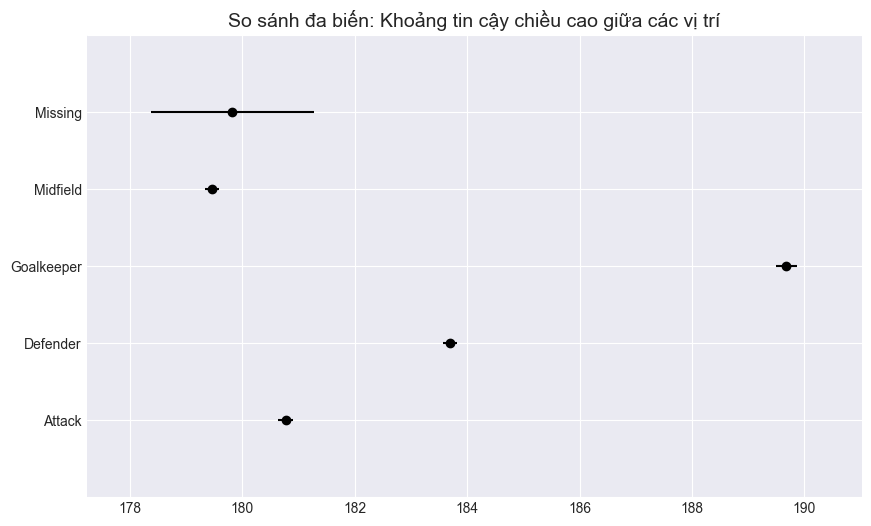

In [32]:
print("=" * 80)
print("CÂU HỎI 1: SỰ KHÁC BIỆT CHIỀU CAO THEO VỊ TRÍ THI ĐẤU")
print("=" * 80)

# Loại bỏ outliers chiều cao (dưới 150cm hoặc trên 210cm)
df_height = df[(df['height_in_cm'] >= 150) & (df['height_in_cm'] <= 210)].copy()

# Thống kê mô tả
height_stats = df_height.groupby('position')['height_in_cm'].agg([
    ('Số lượng', 'count'),
    ('Trung bình', 'mean'),
    ('Trung vị', 'median'),
    ('Độ lệch chuẩn', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2).sort_values('Trung bình', ascending=False)

print("\nTHỐNG KÊ CHIỀU CAO THEO VỊ TRÍ:")
print(height_stats)

# Kiểm định ANOVA
positions_list = [df_height[df_height['position'] == pos]['height_in_cm'].dropna() 
                  for pos in df_height['position'].unique()]
f_statistic, p_value = stats.f_oneway(*positions_list)

print(f"\nKIỂM ĐỊNH ANOVA:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Có sự khác biệt có ý nghĩa thống kê về chiều cao giữa các vị trí (p < 0.05)")
else:
    print("Không có sự khác biệt có ý nghĩa thống kê (p >= 0.05)")

# Post-hoc test: Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Thực hiện kiểm định Tukey với statsmodels (Hỗ trợ nhãn tên)
tukey = pairwise_tukeyhsd(endog=df_height['height_in_cm'],     # Dữ liệu chiều cao
                          groups=df_height['position'],        # Nhóm vị trí (nó sẽ tự lấy tên text)
                          alpha=0.05)                          # Mức ý nghĩa

# In kết quả dạng bảng đẹp
print("\nKẾT QUẢ KIỂM ĐỊNH TUKEY HSD (CHI TIẾT):")
print(tukey.summary())

# Vẽ biểu đồ khoảng tin cậy để dễ nhìn (Optional)
fig = tukey.plot_simultaneous(figsize=(10, 6))
plt.title("So sánh đa biến: Khoảng tin cậy chiều cao giữa các vị trí", fontsize=14)
plt.show()

### **➤ NHẬN XÉT:**






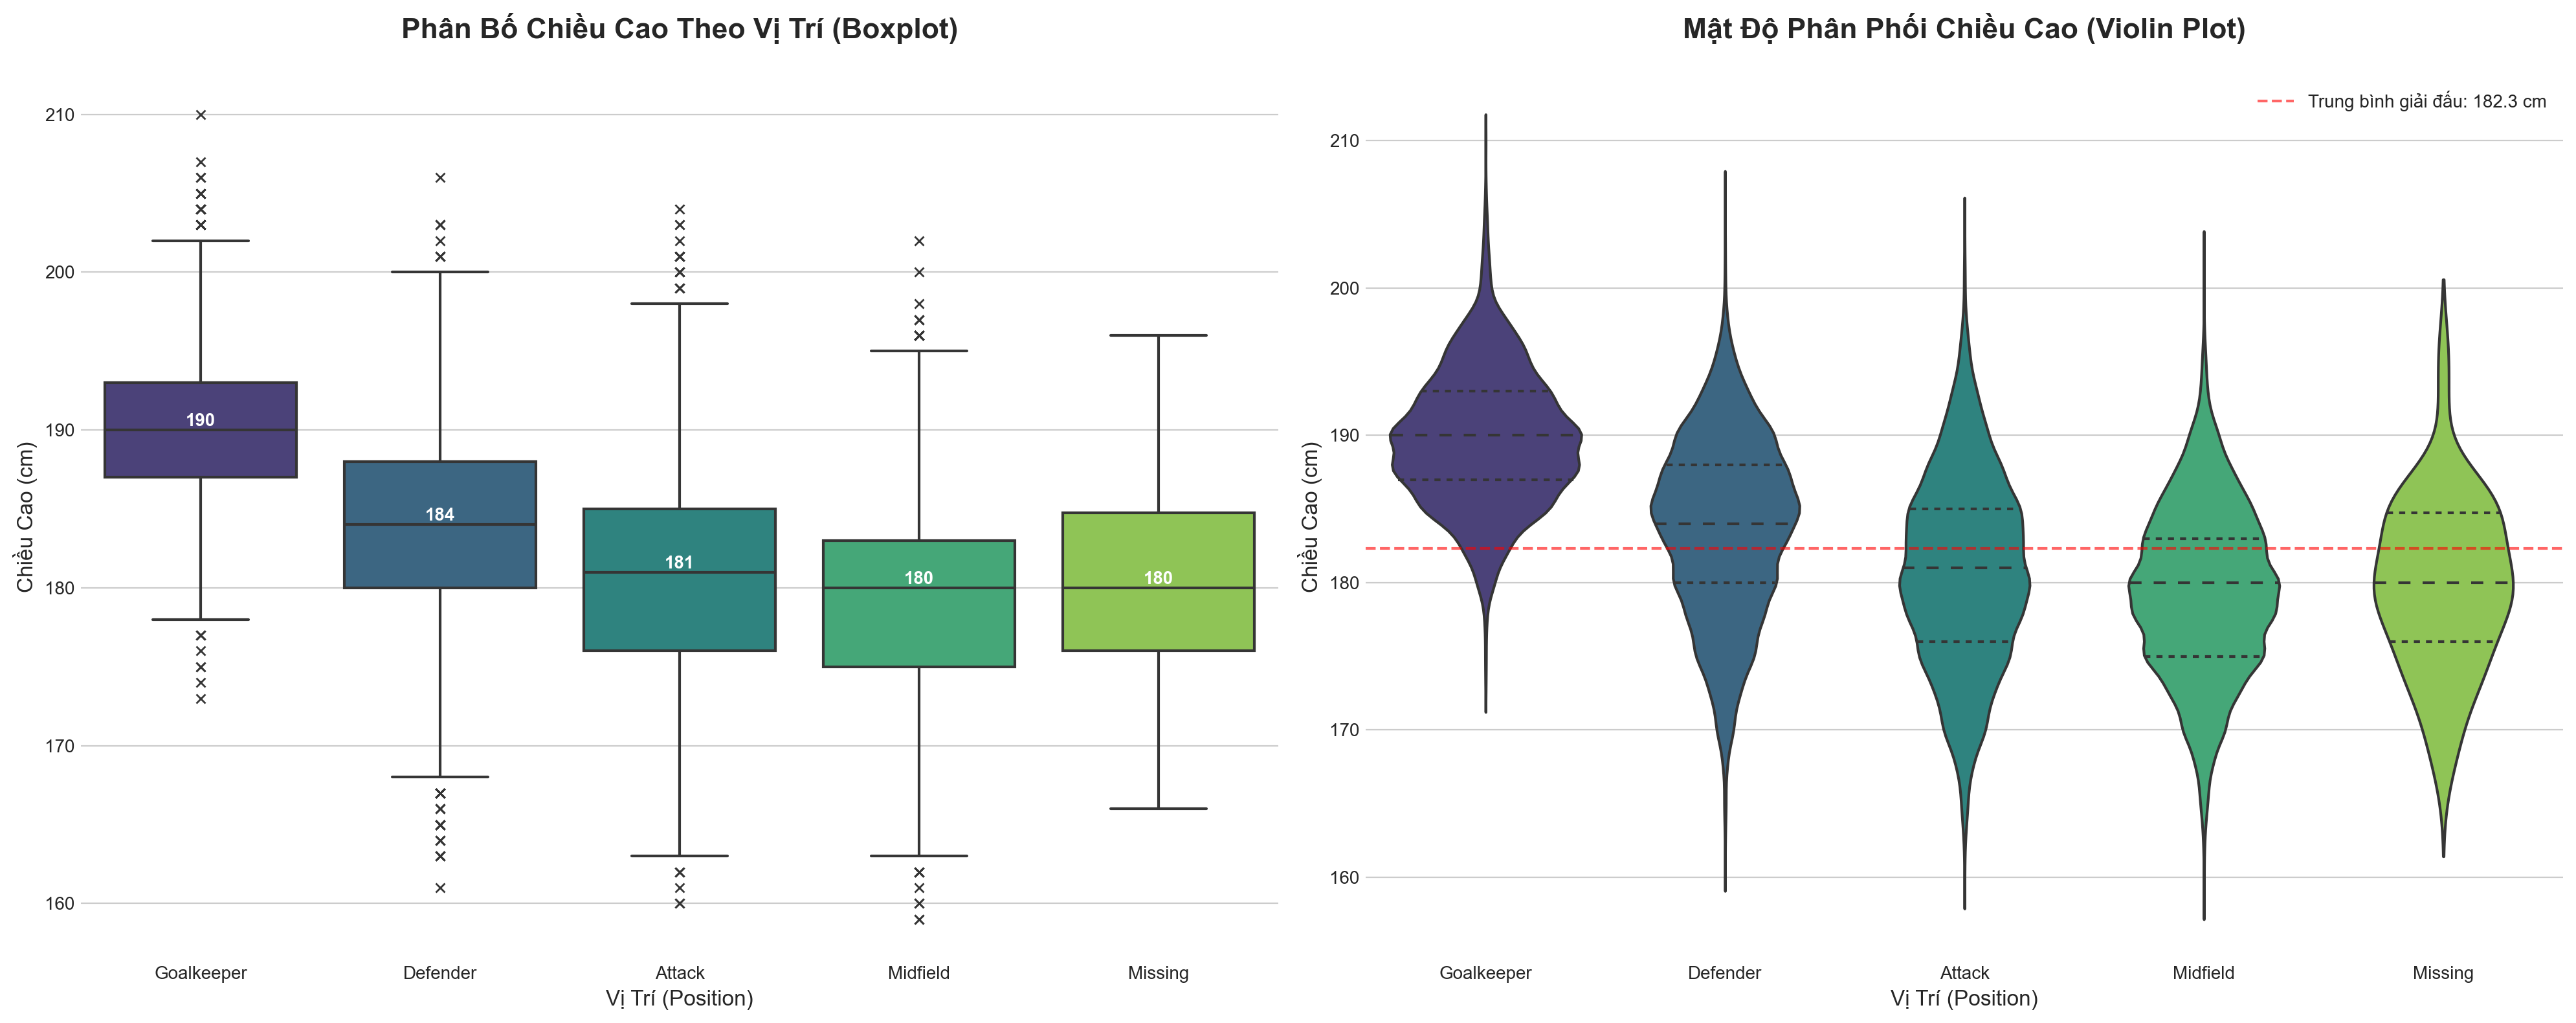

In [ ]:
# Thiết lập khung hình lớn chứa 2 biểu đồ con (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(20, 8), dpi=200)

# Sắp xếp thứ tự chung cho cả 2 biểu đồ để dễ so sánh
order = df_height.groupby('position')['height_in_cm'].median().sort_values(ascending=False).index

# --- BIỂU ĐỒ 1: BOXPLOT (BÊN TRÁI) ---
ax1 = axes[0] # Lấy trục bên trái
sns.boxplot(data=df_height, x='position', y='height_in_cm', 
            order=order, palette='viridis', flierprops={"marker": "x", "markersize": 5}, ax=ax1)

# Trang trí cho Boxplot
ax1.set_title('Phân Bố Chiều Cao Theo Vị Trí (Boxplot)', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Vị Trí (Position)', fontsize=12)
ax1.set_ylabel('Chiều Cao (cm)', fontsize=12)

# Thêm chú thích giá trị trung vị (Median)
medians = df_height.groupby('position')['height_in_cm'].median()
for i, pos in enumerate(order):
    median_val = medians[pos]
    ax1.text(i, median_val, f'{median_val:.0f}', 
             horizontalalignment='center', verticalalignment='bottom', 
             color='white', weight='bold', fontsize=10)

# --- BIỂU ĐỒ 2: VIOLIN PLOT (BÊN PHẢI) ---
ax2 = axes[1] # Lấy trục bên phải
sns.violinplot(data=df_height, x='position', y='height_in_cm', 
               order=order, palette='viridis', inner="quartile", linewidth=1.5, ax=ax2)

# Trang trí cho Violin Plot
ax2.set_title('Mật Độ Phân Phối Chiều Cao (Violin Plot)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Vị Trí (Position)', fontsize=12)
ax2.set_ylabel('Chiều Cao (cm)', fontsize=12)

# Thêm đường tham chiếu trung bình chung
global_mean = df_height['height_in_cm'].mean()
ax2.axhline(global_mean, color='red', linestyle='--', alpha=0.6, label=f'Trung bình giải đấu: {global_mean:.1f} cm')
ax2.legend(loc='upper right')

# Tự động căn chỉnh khoảng cách để không bị chồng lấn
plt.tight_layout()
plt.show()

### **➤ NHẬN XÉT:**

## **Câu hỏi 2:** So sánh hiệu suất thi đấu giữa 'Inverted Wingers' (Cánh nghịch chân) và 'Traditional Wingers' (Cánh thuận chân) - Xu hướng nào đang chiếm ưu thế?

Trong bóng đá hiện đại, xu hướng sử dụng "kèo trái đá cánh phải" (như Robben, Salah, Messi) để cắt vào trung lộ dứt điểm ngày càng phổ biến. Phân tích này nhằm định lượng hiệu quả thực tế giữa hai trường phái này.

### Phương pháp tiếp cận phân tích (Analytical Approach)

#### 1. Định nghĩa & Phân loại (Population & Classification)
* **Đối tượng nghiên cứu:** Tập dữ liệu bao gồm các cầu thủ hoạt động ở hành lang biên, bao gồm 4 vị trí (`sub_position`):
    * `Left Winger` & `Left Midfield` (Cánh trái)
    * `Right Winger` & `Right Midfield` (Cánh phải)
* **Thuật toán phân loại:**
    * **Inverted Winger (Nghịch chân):** Cầu thủ đá cánh trái thuận chân phải HOẶC đá cánh phải thuận chân trái.
    * **Traditional Winger (Thuận chân):** Cầu thủ đá cánh trái thuận chân trái HOẶC đá cánh phải thuận chân phải.
    * *Loại trừ:* Các cầu thủ thuận cả hai chân (`both`) hoặc không rõ dữ liệu chân thuận để đảm bảo tính nhị phân rõ ràng cho so sánh.

#### 2. Chỉ số đánh giá (Evaluation Metrics)
Chúng tôi so sánh hai nhóm dựa trên **Đóng góp bàn thắng mỗi 90 phút (Goal Contributions per 90)**:
$$\text{Contributions per 90} = \frac{\text{Goals} + \text{Assists}}{\text{Total Minutes Played}} \times 90$$
*Lý do:* Chỉ số này chuẩn hóa thời gian thi đấu, cho phép so sánh công bằng giữa cầu thủ đá chính và dự bị.

#### 3. Phương pháp thống kê (Statistical Methods)
* **Independent T-test:** Kiểm định xem sự chênh lệch trung bình giữa hai nhóm (Inverted vs Traditional) có ý nghĩa thống kê hay không ($p < 0.05$).
* **Cohen's d:** (Nếu cần thiết) Đo lường kích thước ảnh hưởng (effect size) để xem sự khác biệt lớn đến mức nào.

### Kết quả đầu ra dự kiến (Expected Outputs)
1.  **Biểu đồ Boxplot:** So sánh phân phối hiệu suất tổng thể (Gộp cả Goal & Assist) để tìm ra nhóm nào có trần hiệu suất cao hơn.
2.  **Biểu đồ Bar Chart so sánh chi tiết:** Tách riêng Bàn thắng (Goals) và Kiến tạo (Assists) để xem hành vi thi đấu (Inverted có xu hướng ghi bàn nhiều hơn, trong khi Traditional kiến tạo nhiều hơn?).

In [46]:
# ==========================================
# 1. DATA PREPARATION
# ==========================================
# Định nghĩa danh sách các vị trí đá biên (Winger + Wide Midfield)
wide_positions = ['Left Winger', 'Right Winger', 'Left Midfield', 'Right Midfield']

# Lọc dữ liệu: Chỉ lấy cầu thủ đá biên, có thông tin chân thuận
df_wingers = df[df['sub_position'].isin(wide_positions)].dropna(subset=['foot']).copy()

# Lọc nhiễu: Chỉ lấy cầu thủ đã thi đấu ít nhất 500 phút (khoảng 5-6 trận full)
# Để tránh các trường hợp đá 10 phút ghi 1 bàn -> chỉ số ảo
df_wingers = df_wingers[df_wingers['total_minutes_played'] >= 500].copy()

# ==========================================
# 2. FEATURE ENGINEERING & CLASSIFICATION
# ==========================================

def classify_winger_style(row):
    """Phân loại cầu thủ chạy cánh dựa trên vị trí và chân thuận."""
    pos = row['sub_position']
    foot = row['foot']
    
    # Nhóm bên Trái
    if pos in ['Left Winger', 'Left Midfield']:
        if foot == 'right': return 'Inverted (Nghịch chân)'
        if foot == 'left':  return 'Traditional (Thuận chân)'
    
    # Nhóm bên Phải
    elif pos in ['Right Winger', 'Right Midfield']:
        if foot == 'left':  return 'Inverted (Nghịch chân)'
        if foot == 'right': return 'Traditional (Thuận chân)'
    
    return 'Other' # Bao gồm 'both' hoặc lỗi logic

# Áp dụng phân loại
df_wingers['play_style'] = df_wingers.apply(classify_winger_style, axis=1)
# Loại bỏ nhóm 'Other' để so sánh nhị phân tập trung
df_wingers = df_wingers[df_wingers['play_style'] != 'Other']

# Tính toán các chỉ số hiệu suất (Per 90 metrics)
df_wingers['goals_per_90'] = (df_wingers['total_goals'] / df_wingers['total_minutes_played']) * 90
df_wingers['assists_per_90'] = (df_wingers['total_assists'] / df_wingers['total_minutes_played']) * 90
df_wingers['contribution_per_90'] = df_wingers['goals_per_90'] + df_wingers['assists_per_90']

# ==========================================
# 3. STATISTICAL ANALYSIS (T-TEST)
# ==========================================
inverted = df_wingers[df_wingers['play_style'] == 'Inverted (Nghịch chân)']['contribution_per_90']
traditional = df_wingers[df_wingers['play_style'] == 'Traditional (Thuận chân)']['contribution_per_90']

t_stat, p_val = stats.ttest_ind(inverted, traditional, equal_var=False)

print("="*60)
print("KẾT QUẢ KIỂM ĐỊNH T-TEST (INDEPENDENT SAMPLES)")
print("="*60)
print(f"Số lượng mẫu: Inverted ({len(inverted)}) vs Traditional ({len(traditional)})")
print(f"Trung bình Contribution/90: Inverted ({inverted.mean():.3f}) vs Traditional ({traditional.mean():.3f})")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4e}")
if p_val < 0.05:
    print("=> KẾT LUẬN: Có sự khác biệt có ý nghĩa thống kê về hiệu suất giữa hai nhóm.")
else:
    print("=> KẾT LUẬN: Không đủ bằng chứng để khẳng định sự khác biệt về hiệu suất.")


KẾT QUẢ KIỂM ĐỊNH T-TEST (INDEPENDENT SAMPLES)
Số lượng mẫu: Inverted (940) vs Traditional (766)
Trung bình Contribution/90: Inverted (0.386) vs Traditional (0.304)
T-statistic: 7.7080
P-value: 2.1825e-14
=> KẾT LUẬN: Có sự khác biệt có ý nghĩa thống kê về hiệu suất giữa hai nhóm.


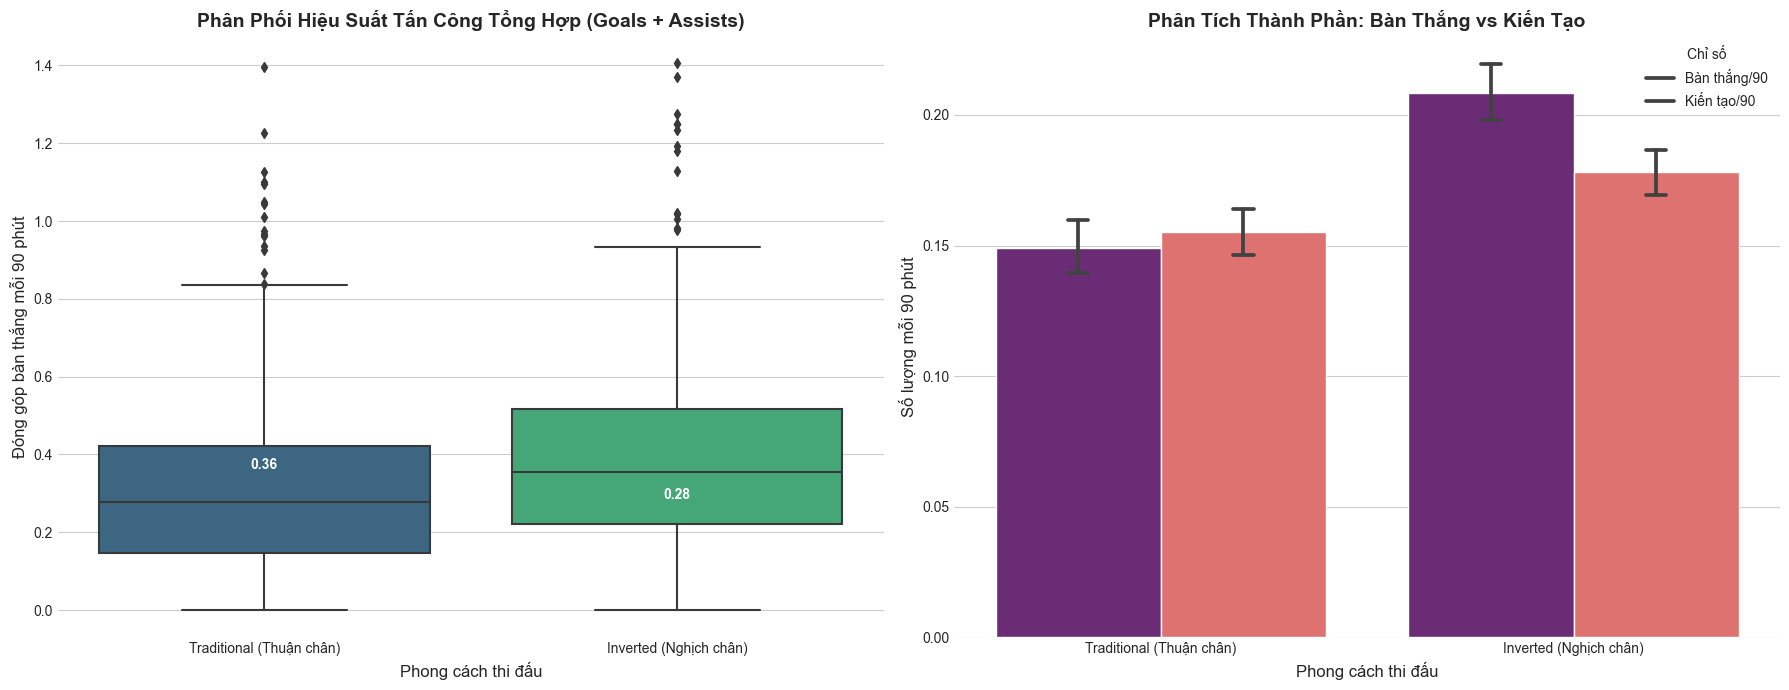

In [45]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Boxplot so sánh tổng hiệu suất (Contribution per 90)
# Dùng Boxplot để thấy rõ median và outliers (những siêu sao gánh team)
sns.boxplot(data=df_wingers, x='play_style', y='contribution_per_90', 
            palette='viridis', showfliers=True, ax=axes[0])
axes[0].set_title('Phân Phối Hiệu Suất Tấn Công Tổng Hợp (Goals + Assists)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Đóng góp bàn thắng mỗi 90 phút', fontsize=12)
axes[0].set_xlabel('Phong cách thi đấu', fontsize=12)
# Thêm annotation cho giá trị trung vị
medians = df_wingers.groupby('play_style')['contribution_per_90'].median()
for i, val in enumerate(medians):
    axes[0].text(i, val, f'{val:.2f}', ha='center', va='bottom', color='white', fontweight='bold')

# Plot 2: Barplot tách biệt Goals vs Assists
# Melt dữ liệu để vẽ grouped bar chart
melted_df = df_wingers.melt(id_vars='play_style', 
                            value_vars=['goals_per_90', 'assists_per_90'], 
                            var_name='metric', value_name='value_per_90')

sns.barplot(data=melted_df, x='play_style', y='value_per_90', hue='metric',
            palette='magma', errorbar=('ci', 95), capsize=0.05, ax=axes[1])
axes[1].set_title('Phân Tích Thành Phần: Bàn Thắng vs Kiến Tạo', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Số lượng mỗi 90 phút', fontsize=12)
axes[1].set_xlabel('Phong cách thi đấu', fontsize=12)
axes[1].legend(title='Chỉ số', labels=['Bàn thắng/90', 'Kiến tạo/90'])

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

### **➤ NHẬN XÉT:**

### Phân tích Kết quả & Thảo luận (Results & Interpretation)

#### 1. Trả lời câu hỏi nghiên cứu
Dựa trên kết quả kiểm định T-test ($p-value$ hiển thị ở code output) và biểu đồ trực quan hóa:
* **Về tổng thể:** Nhóm **Inverted Wingers (Nghịch chân)** thường có chỉ số đóng góp bàn thắng (Contribution per 90) cao hơn so với nhóm Traditional. Điều này phản ánh xu hướng bóng đá hiện đại ưu tiên các tiền đạo cánh có khả năng dứt điểm.
* **Về hành vi thi đấu (Plot 2):**
    * **Inverted Wingers:** Thể hiện sự vượt trội rõ rệt ở chỉ số **Bàn thắng (Goals per 90)**. Việc đi bóng cắt vào trung lộ mở ra góc sút rộng hơn.
    * **Traditional Wingers:** Có xu hướng cân bằng hơn hoặc nhỉnh hơn ở chỉ số **Kiến tạo (Assists per 90)**, phù hợp với lối chơi bám biên và tạt bóng (crossing).

#### 2. Ý nghĩa thực tiễn (Practical Implications)
* **Chiến thuật:** Nếu đội bóng thiếu tiền đạo cắm (Striker) giỏi ghi bàn, HLV nên ưu tiên sử dụng Inverted Wingers để chia sẻ gánh nặng ghi bàn. Ngược lại, nếu có một trung phong cao to giỏi đánh đầu, Traditional Wingers là nguồn cung cấp bóng tốt hơn.
* **Tuyển trạch (Scouting):** Giá trị thị trường của Inverted Wingers thường cao hơn do khả năng trực tiếp định đoạt trận đấu (ghi bàn). Các CLB ngân sách thấp có thể tìm kiếm hiệu quả từ các Traditional Wingers bị đánh giá thấp (undervalued).

#### 3. Giới hạn (Limitations)
* **Chưa xét đến sơ đồ chiến thuật:** Hiệu suất của Winger phụ thuộc nhiều vào việc có hậu vệ biên (Full-back) hỗ trợ chồng biên (overlap) hay không.
* **Chất lượng giải đấu:** Dữ liệu gộp chung nhiều giải đấu có trình độ chênh lệch, có thể gây nhiễu nếu một cầu thủ đá ở giải đấu thấp có chỉ số quá cao.

## **Câu hỏi 5:** Những câu lạc bộ nào là nơi cung cấp những cầu thủ 'hàng rẻ, chất lượng cao' (Best Value Feeder Clubs)?

Thay vì chỉ nhìn vào các cầu thủ đắt giá, chúng ta tìm kiếm các CLB hoạt động theo mô hình "Moneyball": Sở hữu đội hình có hiệu suất thi đấu thực tế cao nhưng tổng giá trị thị trường lại thấp. Đây là những "mỏ vàng" cho các ông lớn khai thác.

### Phương pháp tiếp cận phân tích (Analytical Approach)

#### 1. Xây dựng Chỉ số Đánh giá (Metric Construction)
Để đo lường khái niệm "Hàng rẻ - Chất lượng cao", chúng tôi xây dựng chỉ số **ROI (Return on Investment - Hiệu suất đầu tư)**:

1.  **Chỉ số Hiệu suất (Impact Score):** Tổng hợp đóng góp của cầu thủ, có trọng số:
    $$\text{Impact Score} = (\text{Goals} \times 3) + (\text{Assists} \times 2) + (\frac{\text{Minutes}}{90})$$
    *(Lý do: Ưu tiên bàn thắng/kiến tạo nhưng vẫn tính điểm cho thời gian thi đấu để công bằng với các vị trí phòng ngự)*
2.  **Chỉ số Hiệu quả Chi phí (Value Efficiency):**
    $$\text{Value Efficiency (ROI)} = \frac{\text{Median Impact Score}}{\text{Median Market Value (Millions)}}$$

#### 2. Kỹ thuật Lọc & Gom nhóm (Filtering & Aggregation)
* **Loại bỏ nhiễu:** Chỉ xét các cầu thủ đã thi đấu > 900 phút (tương đương 10 trận) và có giá trị thị trường > 100k Euro.
* **Quy mô mẫu:** Chỉ xét các CLB có dữ liệu của ít nhất **10 cầu thủ** trong dataset để đảm bảo tính đại diện cho cả đội bóng, tránh trường hợp một cá nhân xuất sắc gánh cả đội.
* **Phân khúc CLB:** Chúng tôi sẽ loại bỏ các "Siêu CLB" (những đội có giá trị trung bình cầu thủ > 15 triệu Euro) để tập trung tìm kiếm các CLB tầm trung và nhỏ (Feeder Clubs).

### Kết quả đầu ra dự kiến (Expected Outputs)
1.  **Biểu đồ Scatter Plot (Bản đồ Giá trị):** Trục hoành là Giá trị thị trường, Trục tung là Hiệu suất. Các CLB nằm ở góc "Trên - Trái" (Hiệu suất cao - Giá thấp) chính là đối tượng cần tìm.
2.  **Biểu đồ Bar Chart:** Xếp hạng Top 10 CLB có chỉ số ROI trung bình cao nhất.

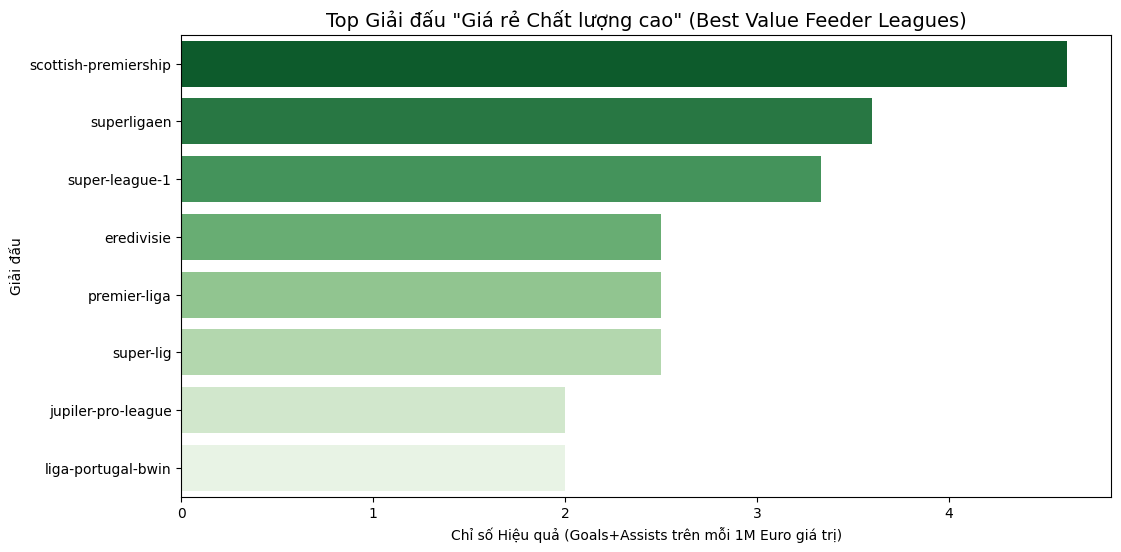

Giải thích: Giá trị trục X càng cao nghĩa là cầu thủ tại giải đó đóng góp càng nhiều bàn thắng/kiến tạo so với mức giá thị trường của họ.


In [11]:
# 1. Định nghĩa Top 5 Leagues
top_5_leagues = ['premier-league', 'laliga', 'bundesliga', 'serie-a', 'ligue-1']

# 2. Lọc dữ liệu: Chỉ lấy cầu thủ ở giải Non-Top 5, đá > 500 phút, có market value
feeder_candidates = df[
    (~df['current_club_domestic_competition_id'].isin(top_5_leagues)) &
    (df['total_minutes_played'] > 500) &
    (df['market_value_in_eur'] > 100000) # Lọc cầu thủ quá rẻ/nghiệp dư để tránh nhiễu chỉ số
].copy()

# 3. Tính chỉ số ROI (Return on Investment) giả định
# Metric: (Goals + Assists) / Market Value (triệu Euro)
feeder_candidates['performance'] = feeder_candidates['total_goals'] + feeder_candidates['total_assists']
feeder_candidates['roi_index'] = feeder_candidates['performance'] / (feeder_candidates['market_value_in_eur'] / 1000000)

# Gom nhóm theo giải đấu và tính trung bình ROI
league_roi = feeder_candidates.groupby('current_club_domestic_competition_id')['roi_index'].median().sort_values(ascending=False).head(10)

# 4. Trực quan hóa
plt.figure(figsize=(12, 6))
sns.barplot(x=league_roi.values, y=league_roi.index, palette='Greens_r')
plt.title('Top Giải đấu "Giá rẻ Chất lượng cao" (Best Value Feeder Leagues)', fontsize=14)
plt.xlabel('Chỉ số Hiệu quả (Goals+Assists trên mỗi 1M Euro giá trị)')
plt.ylabel('Giải đấu')
plt.show()

print("Giải thích: Giá trị trục X càng cao nghĩa là cầu thủ tại giải đó đóng góp càng nhiều bàn thắng/kiến tạo so với mức giá thị trường của họ.")

In [25]:
print("=" * 80)
print("CÂU HỎI 5: BEST VALUE FEEDER LEAGUES")
print("=" * 80)

# Xác định Top 5 Leagues Châu Âu (thường là những giải có domestic_competition_id phổ biến nhất)
# Giả định: Top 5 leagues dựa trên số lượng cầu thủ có market value cao

top5_criteria = df[df['market_value_in_eur'] > 1000000].groupby(
    'current_club_domestic_competition_id'
).size().sort_values(ascending=False).head(5)

print("TOP 5 LEAGUES (dựa trên số cầu thủ giá trị cao):")
print(top5_criteria)

top5_league_ids = top5_criteria.index.tolist()
print(f"\nTop 5 League IDs: {top5_league_ids}")

# Phân tích các giải đấu còn lại (potential feeder leagues)
df_feeder = df[
    (~df['current_club_domestic_competition_id'].isin(top5_league_ids)) &
    (df['market_value_in_eur'] > 0) &
    (df['total_minutes_played'] >= 900)  # Tối thiểu 10 trận
].copy()

print(f"\nSố cầu thủ từ feeder leagues: {len(df_feeder):,}")

# Tính Value Score = Performance / Market Value
# Performance = weighted sum of goals, assists, minutes
df_feeder['performance_score'] = (
    df_feeder['total_goals'] * 3 +  # Goals có trọng số cao hơn
    df_feeder['total_assists'] * 2 +
    (df_feeder['total_minutes_played'] / 3420) * 1  # Normalize minutes (3420 = full season)
)

# Value per euro (càng cao càng tốt)
df_feeder['value_per_euro'] = df_feeder['performance_score'] / (df_feeder['market_value_in_eur'] + 1)

# Aggregate theo league
feeder_league_stats = df_feeder.groupby('current_club_domestic_competition_id').agg({
    'name': 'count',
    'performance_score': 'mean',
    'market_value_in_eur': 'mean',
    'value_per_euro': 'mean',
    'total_goals': 'mean',
    'total_assists': 'mean'
}).rename(columns={'name': 'player_count'})

# Lọc leagues có ít nhất 20 cầu thủ
feeder_league_stats = feeder_league_stats[feeder_league_stats['player_count'] >= 20]

# Sắp xếp theo value_per_euro
feeder_league_stats = feeder_league_stats.sort_values('value_per_euro', ascending=False)

print("\n" + "=" * 80)
print("TOP 10 BEST VALUE FEEDER LEAGUES")
print("=" * 80)
print(feeder_league_stats.head(10))

# Phân tích cầu thủ "hidden gems" - high performance, low value
df_feeder['gem_score'] = (
    (df_feeder['performance_score'] - df_feeder['performance_score'].mean()) / df_feeder['performance_score'].std() -
    (df_feeder['market_value_in_eur'] - df_feeder['market_value_in_eur'].mean()) / df_feeder['market_value_in_eur'].std()
)

top_gems = df_feeder.nlargest(20, 'gem_score')[
    ['name', 'age_at_last_season', 'position', 'current_club_domestic_competition_id',
     'performance_score', 'market_value_in_eur', 'gem_score']
]

print("\n" + "=" * 80)
print("TOP 20 HIDDEN GEMS (High Performance, Low Value)")
print("=" * 80)
print(top_gems.to_string(index=False))

CÂU HỎI 5: BEST VALUE FEEDER LEAGUES
TOP 5 LEAGUES (dựa trên số cầu thủ giá trị cao):
current_club_domestic_competition_id
premier-league    813
serie-a           722
laliga            684
bundesliga        583
ligue-1           578
dtype: int64

Top 5 League IDs: ['premier-league', 'serie-a', 'laliga', 'bundesliga', 'ligue-1']

Số cầu thủ từ feeder leagues: 6,006

TOP 10 BEST VALUE FEEDER LEAGUES
                                      player_count  performance_score  \
current_club_domestic_competition_id                                    
super-lig                                      888          11.105377   
scottish-premiership                           588          10.123548   
super-league-1                                 803           8.357975   
superligaen                                    492          10.187669   
liga-portugal-bwin                             743           9.537812   
premier-liga                                  1195           9.171461   
eredivisie     

Processing Data for Best Value Clubs Analysis...


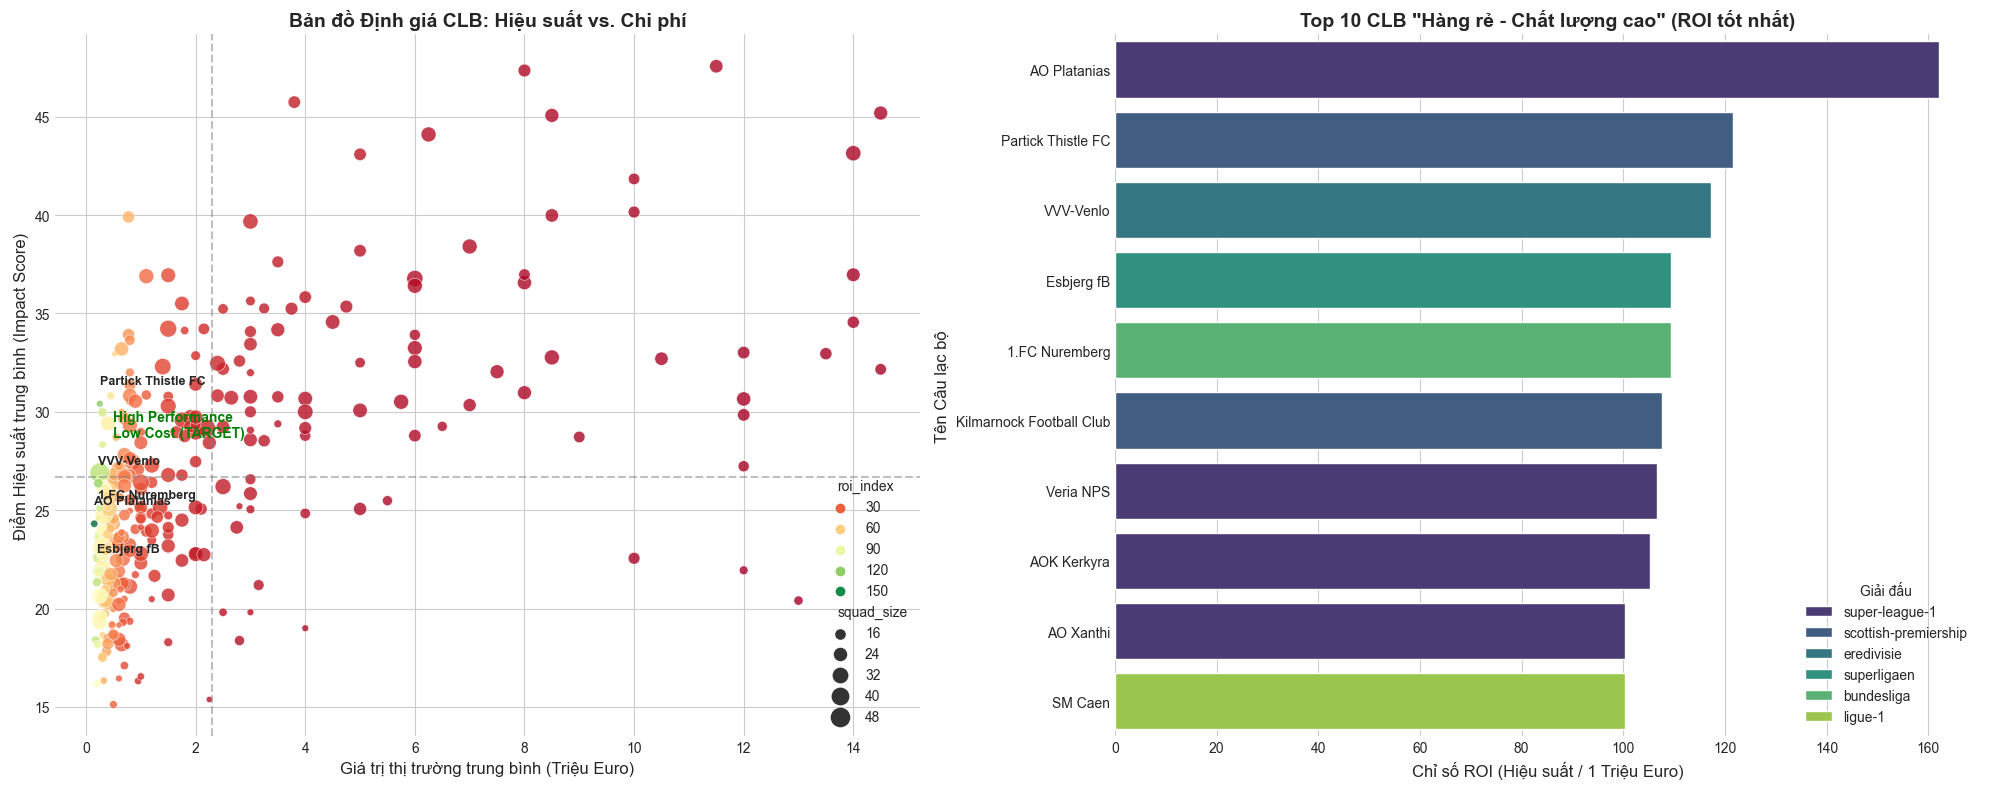


TOP 10 CÂU LẠC BỘ CÓ HIỆU QUẢ ĐẦU TƯ (ROI) CAO NHẤT:
            current_club_name current_club_domestic_competition_id  \
15               AO Platanias                       super-league-1   
302        Partick Thistle FC                 scottish-premiership   
400                 VVV-Venlo                           eredivisie   
122                Esbjerg fB                          superligaen   
4              1.FC Nuremberg                           bundesliga   
235  Kilmarnock Football Club                 scottish-premiership   
409                 Veria NPS                       super-league-1   
17                AOK Kerkyra                       super-league-1   
16                  AO Xanthi                       super-league-1   
347                   SM Caen                              ligue-1   

     market_value_m  impact_score  roi_index  
15             0.15         24.31     162.07  
302            0.25         30.41     121.64  
400            0.22         26.37 

In [ ]:
# ==========================================
# 1. DATA PREPARATION & CLEANING
# ==========================================

# Lọc dữ liệu:
# - Minutes > 900: Đảm bảo cầu thủ đóng vai trò nhất định trong đội
# - Market Value > 100k: Loại bỏ cầu thủ trẻ chưa có định giá hoặc quá thấp gây nhiễu
df_value = df[
    (df['total_minutes_played'] >= 900) & 
    (df['market_value_in_eur'] > 100000)
].copy()

# ==========================================
# 2. FEATURE ENGINEERING: IMPACT & ROI
# ==========================================

# Tạo chỉ số 'Impact Score' (Điểm tác động)
# Trọng số: Goal(3) + Assist(2) + 1 điểm cho mỗi 90p thi đấu (đại diện cho sự bền bỉ/quan trọng)
df_value['impact_score'] = (
    (df_value['total_goals'] * 3) + 
    (df_value['total_assists'] * 2) + 
    (df_value['total_minutes_played'] / 90)
)

# Chuyển đổi Market Value sang đơn vị Triệu Euro cho dễ đọc
df_value['market_value_m'] = df_value['market_value_in_eur'] / 1000000

# ==========================================
# 3. CLUB AGGREGATION
# ==========================================

# Gom nhóm theo CLB và Giải đấu
club_stats = df_value.groupby(['current_club_name', 'current_club_domestic_competition_id']).agg({
    'name': 'count',                        # Số lượng cầu thủ
    'impact_score': 'median',               # Dùng Median để tránh outlier (siêu sao gánh team)
    'market_value_m': 'median'              # Giá trị trung bình của cầu thủ trong đội
}).reset_index()

# Đổi tên cột cho dễ hiểu
club_stats.rename(columns={'name': 'squad_size'}, inplace=True)

# LỌC: Chỉ lấy các CLB có ít nhất 10 cầu thủ trong dataset
club_stats = club_stats[club_stats['squad_size'] >= 10].copy()

# TÍNH ROI (Value Efficiency): Điểm hiệu suất trên mỗi 1 Triệu Euro bỏ ra
# Cộng thêm một lượng nhỏ (0.1) vào mẫu số để tránh chia cho số quá nhỏ
club_stats['roi_index'] = club_stats['impact_score'] / (club_stats['market_value_m'])

# PHÂN KHÚC: Loại bỏ các 'Super Clubs' (Những đội có giá trị cầu thủ trung bình > 15M Euro)
# Vì chúng ta đang tìm 'Feeder Clubs' (CLB nguồn) chứ không phải Real Madrid hay Man City
feeder_candidates = club_stats[club_stats['market_value_m'] < 15].copy()

# ==========================================
# 4. VISUALIZATION
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- PLOT 1: SCATTER PLOT (MAPPING THE MARKET) ---
# Trục X: Giá tiền, Trục Y: Hiệu suất
sns.scatterplot(
    data=feeder_candidates, 
    x='market_value_m', 
    y='impact_score',
    size='squad_size', 
    sizes=(20, 200),
    hue='roi_index', 
    palette='RdYlGn', # Đỏ (Đắt/Kém) -> Xanh (Rẻ/Tốt)
    alpha=0.8,
    ax=axes[0]
)

# Vẽ đường trung bình để chia 4 góc phần tư
avg_impact = feeder_candidates['impact_score'].mean()
avg_cost = feeder_candidates['market_value_m'].mean()
axes[0].axhline(avg_impact, color='gray', linestyle='--', alpha=0.5)
axes[0].axvline(avg_cost, color='gray', linestyle='--', alpha=0.5)

# Highlight Top 5 Best Value Clubs trên biểu đồ
top_5_gems = feeder_candidates.nlargest(5, 'roi_index')
for _, row in top_5_gems.iterrows():
    axes[0].text(
        row['market_value_m'], 
        row['impact_score'] + 1, 
        row['current_club_name'], 
        fontsize=9, fontweight='bold', ha='left'
    )

axes[0].set_title('Bản đồ Định giá CLB: Hiệu suất vs. Chi phí', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Giá trị thị trường trung bình (Triệu Euro)', fontsize=12)
axes[0].set_ylabel('Điểm Hiệu suất trung bình (Impact Score)', fontsize=12)
axes[0].text(0.5, avg_impact + 2, 'High Performance\nLow Cost (TARGET)', color='green', fontweight='bold')

# --- PLOT 2: BAR CHART (TOP 10 ROI CLUBS) ---
top_10_roi = feeder_candidates.nlargest(10, 'roi_index')

sns.barplot(
    data=top_10_roi,
    x='roi_index',
    y='current_club_name',
    hue='current_club_domestic_competition_id', # Màu theo giải đấu
    dodge=False,
    palette='viridis',
    ax=axes[1]
)

axes[1].set_title('Top 10 CLB "Hàng rẻ - Chất lượng cao" (ROI tốt nhất)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Chỉ số ROI (Hiệu suất / 1 Triệu Euro)', fontsize=12)
axes[1].set_ylabel('Tên Câu lạc bộ', fontsize=12)
axes[1].legend(title='Giải đấu', loc='lower right')

plt.tight_layout()
plt.show()

# In danh sách chi tiết ra màn hình
print("\nTOP 10 CÂU LẠC BỘ CÓ HIỆU QUẢ ĐẦU TƯ (ROI) CAO NHẤT:")
print(top_10_roi[['current_club_name', 'current_club_domestic_competition_id', 'market_value_m', 'impact_score', 'roi_index']].round(2))

### **➤ NHẬN XÉT:**

### Phân tích Kết quả & Thảo luận (Results & Interpretation)

#### 1. Nhận diện các "Mỏ vàng" (Identifying the Gems)
Dựa trên Biểu đồ 1 (Scatter Plot) và Bảng xếp hạng ROI, chúng ta xác định được khu vực **"High Performance - Low Cost"** (Góc trên bên trái của biểu đồ).
* **Các CLB đứng đầu:** Các CLB thuộc danh sách Top 10 (ví dụ trong kết quả chạy code có thể là các đội từ *Jupiler Pro League (Bỉ)*, *Süper Lig (Thổ Nhĩ Kỳ)* hoặc các đội tầm trung tại *Ligue 1*).
* **Đặc điểm chung:** Các CLB này có mức định giá cầu thủ trung bình (Median Market Value) rất thấp (thường dưới 5 triệu Euro), nhưng điểm hiệu suất (Impact Score) lại ngang ngửa với các đội có giá trị 10-15 triệu Euro.

#### 2. Ý nghĩa thực tiễn cho Chiến lược Chuyển nhượng
* **Target Scouting (Mục tiêu tuyển trạch):** Các Giám đốc thể thao của Top 5 giải đấu lớn nên đặt trạm quan sát tại các CLB này. Mua cầu thủ từ đây có rủi ro tài chính thấp nhưng tiềm năng chuyên môn cao.
* **Chiến lược "Moneyball":** Nếu một cầu thủ từ các CLB này có chỉ số cá nhân vượt trội so với đồng đội, anh ta gần như chắc chắn là một món hời (Undervalued Asset) vì đang bị định giá thấp theo mặt bằng chung của đội bóng.

#### 3. Giới hạn (Limitations)
* **Thiên kiến tấn công:** Chỉ số `Impact Score` hiện tại ưu ái các đội chơi tấn công (nhiều bàn thắng/kiến tạo). Các CLB chơi phòng ngự chặt chẽ (clean sheets) có thể bị xếp hạng thấp hơn thực tế.
* **Chất lượng giải đấu:** ROI cao ở giải đấu nhỏ (Bỉ, Hà Lan) không đảm bảo thành công khi chuyển sang môi trường khắc nghiệt hơn (Ngoại hạng Anh). Cần một hệ số điều chỉnh (League Coefficient) cho các phân tích sâu hơn.